In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rc('axes', labelsize=16)

import h5py

## Spiral galaxy models

In [2]:
def sersic(n, Ie, re, r):
    bn = 2*n - 1/3
    return Ie * np.exp(-bn*((r/re)**(1/n)-1))

def prob_sersic(n, Ie, re, r):
    return sersic(n, Ie, re, r) * 2*np.pi*r


def spiral(n, Ie, re, Na, w, p, r, phi):
    return sersic(n, Ie, re, r) * (1 + w*np.sin(Na/np.tan(p) * np.log10(r) - Na*phi))

def prob_spiral(n, Ie, re, Na, w, p, r, phi):
    return spiral(n, Ie, re, Na, w, p, r, phi) * r

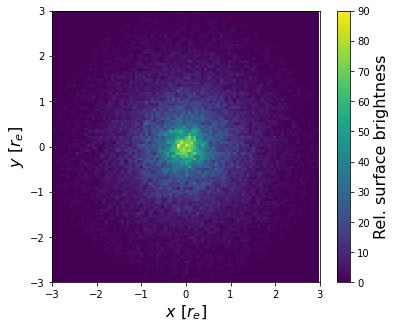

In [3]:
#Disky galaxy

n_sersic = 1; re = 2; Ie = 1; rmax = 3*re
N = 50000

#Draw random samples of radius and probability
r = np.random.uniform(0,rmax,5*N)
pr = np.random.uniform(0,prob_sersic(n_sersic, Ie, re, re),5*N)

#Accept/Reject method
mask = pr <= prob_sersic(n_sersic, Ie, re, r)
r = (r[mask])[:N]

#Spread out in a 2D disk
theta = np.random.uniform(0,2*np.pi,N)
rx = r * np.cos(theta) / re
ry = r * np.sin(theta) / re

plt.figure(figsize=(6,5))

plt.hist2d(rx, ry, bins=100)
plt.gca().set(xlabel='$x\ [r_e]$', ylabel='$y\ [r_e]$', xlim=(-rmax/re,rmax/re), ylim=(-rmax/re,rmax/re))
plt.colorbar(label='Rel. surface brightness');

#np.savetxt('disk_galaxy.txt', np.c_[rx, ry], fmt='%.3f')

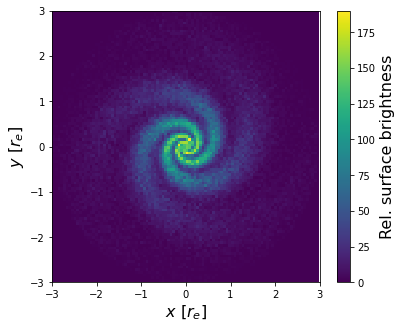

In [4]:
#Spiral arm galaxy

n_sersic = 1; re = 2; Ie = 1; rmax = 3*re; Na = 3; w = 0.6; p = 10*np.pi/180
N = 100000

#Now both radius and phi dependence
r = np.random.uniform(0,rmax,5*N)
phi = np.random.uniform(0,2*np.pi,5*N)
pr = np.random.uniform(0,np.max(prob_spiral(n_sersic, Ie, re, Na, w, p, r, phi)),5*N)

mask = pr <= prob_spiral(n_sersic, Ie, re, Na, w, p, r, phi)
r = (r[mask])[:N]
phi = (phi[mask])[:N]

rx = r*np.cos(phi) / re
ry = r*np.sin(phi) / re

plt.figure(figsize=(6,5))

plt.hist2d(rx, ry, bins=100)
plt.gca().set(xlabel='$x\ [r_e]$', ylabel='$y\ [r_e]$', xlim=(-rmax/re,rmax/re), ylim=(-rmax/re,rmax/re))
plt.colorbar(label='Rel. surface brightness');

#np.savetxt('spiralarm_galaxy.txt', np.c_[rx, ry], fmt='%.3f')

## From fluctuations to scale structure

In [5]:
def region(C, dim):
    X = np.array([C[0]-dim[0], C[0]+dim[0], C[0]+dim[0], C[0]-dim[0], C[0]-dim[0]])
    Y = np.array([C[1]-dim[1], C[1]-dim[1], C[1]+dim[1], C[1]+dim[1], C[1]-dim[1]])
    return X, Y


def draw_points_from_field(field, nsam):
    data = field.flatten()
    x,y = np.meshgrid(np.arange(field.shape[1]), np.arange(field.shape[0]))
    x,y = x.flatten(), y.flatten()

    X = []; Y = []
    for i in range(len(data)):
        X.extend([x[i]]*round(1/min(data)*data[i]))
        Y.extend([y[i]]*round(1/min(data)*data[i]))
    
    try:
        idx = np.random.choice(np.arange(len(X)), nsam, replace=False)
    except ValueError:
        print(f'Length of list: {len(X)}!')
    X = np.take(X, idx)
    Y = np.take(Y, idx)
    
    return X, Y

In [6]:
f = h5py.File('simulation256_z4.hdf5', 'r')
rho_dm = np.array(f['Data']['rho_m']) #Dark matter density g cm^-3
delta_dm = rho_dm / np.mean(rho_dm)

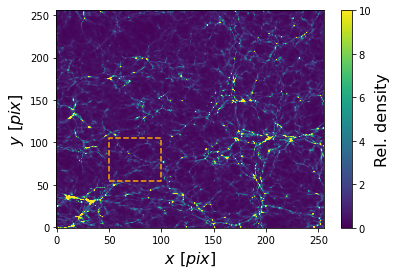

In [7]:
plt.imshow(delta_dm[128], aspect='auto', origin='lower', clim=(0,10))

X, Y = region([75, 80], [25,25])
plt.plot(X, Y, color='orange', linestyle='dashed')

plt.gca().set(xlabel='$x\ [pix]$', ylabel='$y\ [pix]$')
plt.colorbar(label='Rel. density');

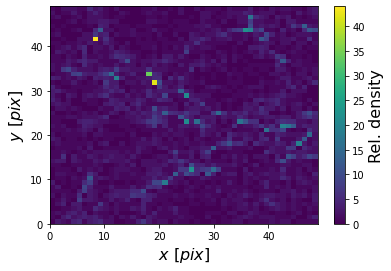

In [8]:
dm = delta_dm[128,55:105,50:100]

x, y = draw_points_from_field(dm, nsam=5000)
plt.hist2d(x,y, bins=50)

plt.gca().set(xlabel='$x\ [pix]$', ylabel='$y\ [pix]$')
plt.colorbar(label='Rel. density');

#np.savetxt('final_large_scale_structure.txt', np.c_[x, y], fmt='%i')

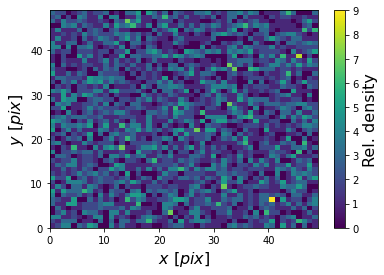

In [9]:
T = np.random.uniform(1, 10, (50,50))

x, y = draw_points_from_field(T, nsam=5000)
plt.hist2d(x,y, bins=50)

plt.gca().set(xlabel='$x\ [pix]$', ylabel='$y\ [pix]$')
plt.colorbar(label='Rel. density');

#np.savetxt('initial_random_fluctuations.txt', np.c_[x, y], fmt='%i')